### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent Variable: Word condition (Congruent or Incongruent)
Dependent Variable: Response time

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

µi is the population average response time for incongruent words.
µc is the population average response time for congruent words

Null Hypothesis: (µi-µc =0)There is no significant difference in the population average response time in viewing congruent words vs incongruent words. 
Alternate Hypothesis: (µi-µc ≠ 0)There is significant difference in the population average response time in viewing congruent words vs incongruent words.

Statistical Test: Dependent t-test(two-tailed)

1. We need to check the difference between the means of two related groups to determine if there is a statistically significant difference between two means.
2. The sample size is less than 30 and the distribution is nearly normal.
3. We don't know the population standard deviation and we are comparing two dependent samples of data.

Reason for choosing t-test over the z-test

1. We do not know the population standard deviation.
2. We have a sample size less than 30.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics
from collections import Counter
import scipy.stats as spi
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as smsdia
%matplotlib inline


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df['subject'] = df.index + 1
df

,Congruent,Incongruent,subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


## Measuring the Central tendency of the dataset

In [5]:
#median of congruent data
statistics.median(df['Congruent'])

14.3565

In [6]:
#median of Incongruent data
statistics.median(df['Incongruent'])

21.017499999999998

In [7]:
#mean of congruent data
mean_C = np.mean(df['Congruent'])
mean_C

14.051124999999999

In [8]:
#mean of Incongruent data
mean_Inc =np.mean(df['Incongruent'])
mean_Inc


22.015916666666666

## Measuring the variability of the dataset

In [9]:
#population standard deviation for congruent data
stddev_C = statistics.pstdev(df['Congruent'])

In [10]:
#population standard deviation for congruent data
stddev_Inc = statistics.pstdev(df['Incongruent'])

In [11]:
#variance of congruent data
statistics.pvariance(df['Congruent'])

12.141152859375001

In [12]:
#variance of incongruent data
statistics.pvariance(df['Incongruent'])

22.052933826388891

In [13]:
#interquartile range for congruent data
spi.iqr(df['Congruent'],axis=None, rng=(25, 75))

4.3054999999999986

In [14]:
#interquartile range for Incongruent data
spi.iqr(df['Incongruent'],axis=None, rng=(25, 75))

5.3347499999999997

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

## Plotting Histograms and Scatter plots to better understand the data.

Text(0.5,1,'Histogram of Congruent data')

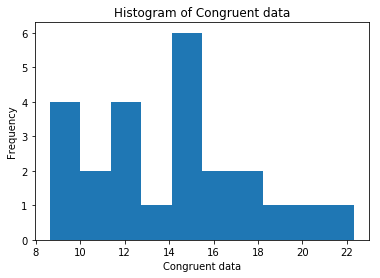

In [15]:
# Build the visualizations here
#Histogram of Congruent data
plt.hist(df['Congruent'])
plt.xlabel("Congruent data")
plt.ylabel("Frequency")
plt.title("Histogram of Congruent data")

From the Histogram above, we see that the Congruent data is not normally distributed. The data values between 14 and 15 have the highest frequency of 6 which also falls close to our mean and median values. 

Text(0.5,1,'Histogram of Incongruent data')

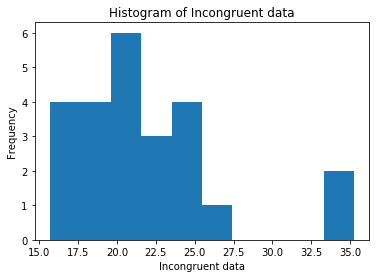

In [16]:
#Histogram of incongruent data
plt.hist(df['Incongruent'])
plt.xlabel("Incongruent data")
plt.ylabel("Frequency")
plt.title("Histogram of Incongruent data")

From the Histogram above, we see that the Incongruent data provided here is not normally distributed. Histogram of the data provided almost appears to be left-skewed if data values between 33 and 35 are considered to be outliers.
 The mean of incongruent data is slighly less than the median being the reason for skewness. The skewness may be limited to this sample of data provided. Larger sample of data may provide a different form of distribution. Thus we cannot conclude that response time for the incongruent condition will always be skewed or normal without a large dataset.
 

**Let us now remove the outlier values from the above distribution. This will give us a better understanding of the relationship between Incongruent and Congruent data.**


In [17]:
fd = df[df.Incongruent < 32.5]

Text(0.5,1,'Scatter plot')

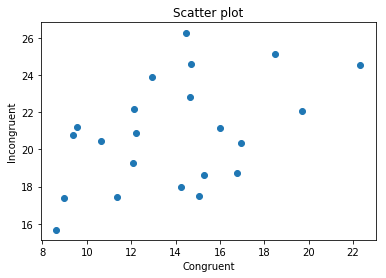

In [18]:
#scatter plot between Congruent and Incongruent
plt.scatter(x=fd['Congruent'], y=fd['Incongruent'])
plt.xlabel("Congruent")
plt.ylabel("Incongruent")
plt.title("Scatter plot")

The scatter plot below shows positive linear relationship. The data points are well scattered in the plot indicating that it might be difficult to fit the data. We also see that higher values on the congruent data have lower values in the incongruent data. Alternatively lower congruent data values have higher incongruent data values. These indicate that the data is not consistent. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

# Performing a dependent samples t-test on the data

**Assumptions:
1.Sampling distribution of means are normal.
2.We assume that the sampling is random and the pairs of observation are independent.
3.The differences here are of measurement variables.**

**Confidence Level = 90%
t-critical value value for two sided test is got from t-table
degrees of freedom = n - 1 = 23**

In [20]:
n = len(df)
n

24

In [21]:
#point estimate of μi - μc -> PE (in seconds)
PE = mean_Inc - mean_C
round(PE,2)

7.96

In [22]:
#s - sample standard deviation of differences
#1. Diff = sample difference
df['Diff'] = df['Incongruent'] - df['Congruent']

#2. DiffM = difference from the mean
#SDM = squared differences from the mean
DiffM = df['Diff'] - df['Diff'].mean()
df['SDM'] = DiffM*DiffM

#3. SSD = sum of squared differences
SSD = df['SDM'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [23]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0206999999999997

t-statistic > t-critical
8.0207 > 1.711

Since the t-critical value is less than the t-statistic we reject the null hypothesis. Thus there is significant difference between the average response time for congruent and incongruent conditions. These results are as expected, as we would see the same if we calcuate the difference between incongruent and congruent values for each individual.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effects are due to the delay in response time for incongruent conditions.Also I believe that cognitive abilities differ accross individuals, we would need more information on the history and charctertistics of individuals to better draw conclusions about the effects.

Other similar tests where we could see the same effect are emotional stroop tests where people are required to name the color of an emotional word("cancer","funeral") and then name the color of a neutral word. This test should have similar results. Another one would be sanity test on people who are medicated and on the same person when not medicated. This test will also produce similar results to our current test.